In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from crabnet.crabnet_ import CrabNet

In [4]:
import numpy as np
import pandas as pd
from pymatgen.core import Composition
from sklearn.model_selection import train_test_split

from gptchem.data import get_moosavi_cv_data

In [5]:
data = get_moosavi_cv_data()

In [6]:
def try_except_nan(func, *args, **kwargs):
    try:
        return func(*args, **kwargs)
    except:
        return np.nan


def comp_to_str(x):
    return str(Composition(x).reduced_formula)

In [7]:
data

,name,Cv_gravimetric_300.00,mofid,grouped_mof,composition
0,RSM0012,0.724854,[Co].[O-]C(=O)C=CC(=O)[O-].[O-]C(=O)[CH][CH]C(...,"linker [O-]C(=O)C=CC(=O)[O-], [O-]C(=O)[CH][CH...",Co2 H4 C8 O8
1,RSM0015,0.850974,"[Co].[O-]C=Opcu,nbo.cat0","linker [O-]C=O, nodes [Co], topology pcu,nbo",Co2 H6 C6 O12
2,RSM0023,0.676886,"[Cu].[N]1C=NN=C1lim,.cat0","linker [N]1C=NN=C1, nodes [Cu], topology lim,",Cu4 H8 C8 N12
3,RSM0065,0.608761,[Cd].[O-]C(=O)c1cc(ccc1C(=O)[O-])C(=O)[O-]ths....,"linker [O-]C(=O)c1cc(ccc1C(=O)[O-])C(=O)[O-], ...",Cd3 H6 C18 O12
4,RSM0076,0.847654,O.[Co].[O-]C(=O)c1ccc(cc1)C(=O)[O-]rna.cat0,"linker [O-]C(=O)c1ccc(cc1)C(=O)[O-], nodes O, ...",Co2 H12 C16 O10
...,...,...,...,...,...
138,RSM1823,0.868681,[Mn].[O-]C(=O)c1ccc2c3c1c(ccc3C(=O)N(C2=O)c1cc...,linker [O-]C(=O)c1ccc2c3c1c(ccc3C(=O)N(C2=O)c1...,Mn4 H32 C76 N8 O24
139,RSM1852,0.809495,S1Cc2ccc(cc2)CSCc2ccc(C1)cc2.[Cu]Br.cat1,"linker S1Cc2ccc(cc2)CSCc2ccc(C1)cc2, nodes [Cu...",Cu4 H64 C64 S8 Br4
140,RSM1868,0.756509,[Ni].[O-]C(=O)c1cnccn1.[O].[V].[V][V].cat0,"linker [O-]C(=O)c1cnccn1, nodes [Ni], [O], [V]...",V12 Ni8 H24 C40 N16 O46
141,RSM1883,0.803414,[O-]C(=O)c1cc(OCOc2cc(cc(c2)C(=O)[O-])C(=O)[O-...,linker [O-]C(=O)c1cc(OCOc2cc(cc(c2)C(=O)[O-])C...,Zn8 H32 C68 O40


In [8]:
data["target"] = pd.qcut(data["Cv_gravimetric_300.00"], 5, labels=np.arange(5))

In [10]:
data["formula"] = data["composition"].map(lambda x: try_except_nan(comp_to_str, x))

In [11]:
data.dropna(inplace=True)

In [12]:
data

,name,Cv_gravimetric_300.00,mofid,grouped_mof,composition,target,formula
0,RSM0012,0.724854,[Co].[O-]C(=O)C=CC(=O)[O-].[O-]C(=O)[CH][CH]C(...,"linker [O-]C(=O)C=CC(=O)[O-], [O-]C(=O)[CH][CH...",Co2 H4 C8 O8,1,CoH2(CO)4
1,RSM0015,0.850974,"[Co].[O-]C=Opcu,nbo.cat0","linker [O-]C=O, nodes [Co], topology pcu,nbo",Co2 H6 C6 O12,3,CoH3(CO2)3
2,RSM0023,0.676886,"[Cu].[N]1C=NN=C1lim,.cat0","linker [N]1C=NN=C1, nodes [Cu], topology lim,",Cu4 H8 C8 N12,0,CuH2C2N3
3,RSM0065,0.608761,[Cd].[O-]C(=O)c1cc(ccc1C(=O)[O-])C(=O)[O-]ths....,"linker [O-]C(=O)c1cc(ccc1C(=O)[O-])C(=O)[O-], ...",Cd3 H6 C18 O12,0,CdH2(C3O2)2
4,RSM0076,0.847654,O.[Co].[O-]C(=O)c1ccc(cc1)C(=O)[O-]rna.cat0,"linker [O-]C(=O)c1ccc(cc1)C(=O)[O-], nodes O, ...",Co2 H12 C16 O10,3,CoH6C8O5
...,...,...,...,...,...,...,...
138,RSM1823,0.868681,[Mn].[O-]C(=O)c1ccc2c3c1c(ccc3C(=O)N(C2=O)c1cc...,linker [O-]C(=O)c1ccc2c3c1c(ccc3C(=O)N(C2=O)c1...,Mn4 H32 C76 N8 O24,3,MnH8C19(NO3)2
139,RSM1852,0.809495,S1Cc2ccc(cc2)CSCc2ccc(C1)cc2.[Cu]Br.cat1,"linker S1Cc2ccc(cc2)CSCc2ccc(C1)cc2, nodes [Cu...",Cu4 H64 C64 S8 Br4,2,CuH16C16S2Br
140,RSM1868,0.756509,[Ni].[O-]C(=O)c1cnccn1.[O].[V].[V][V].cat0,"linker [O-]C(=O)c1cnccn1, nodes [Ni], [O], [V]...",V12 Ni8 H24 C40 N16 O46,1,V6Ni4H12C20N8O23
141,RSM1883,0.803414,[O-]C(=O)c1cc(OCOc2cc(cc(c2)C(=O)[O-])C(=O)[O-...,linker [O-]C(=O)c1cc(OCOc2cc(cc(c2)C(=O)[O-])C...,Zn8 H32 C68 O40,2,Zn2H8C17O10


In [14]:
cb = CrabNet(mat_prop="target", classification=True)


Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cpu


In [15]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [17]:
cb.classification = True

Model size: 11987206 parameters



Generating EDM: 100%|██████████| 91/91 [00:00<00:00, 39688.23formulae/s]


loading data with up to 8 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 23/23 [00:00<00:00, 5192.93formulae/s]


loading data with up to 8 elements in the formula
stepping every 10 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler
Using BCE loss for classification task
Epoch: 0/300 --- train auc: 0.446 val auc: 0.606


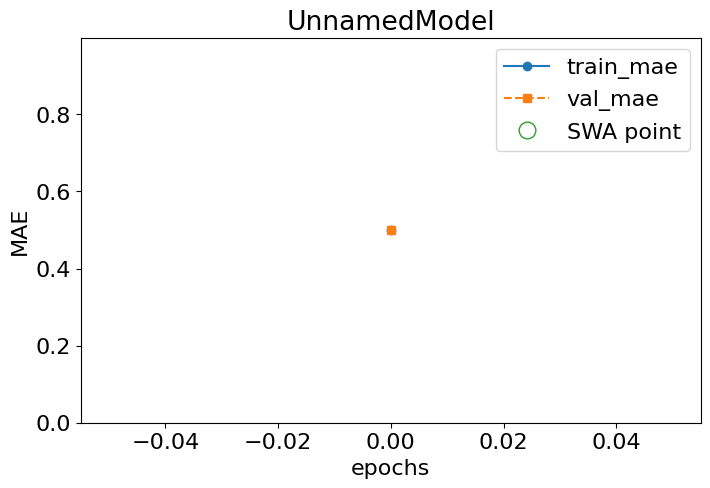

Epoch: 19/300 --- train auc: 0.938 val auc: 0.652


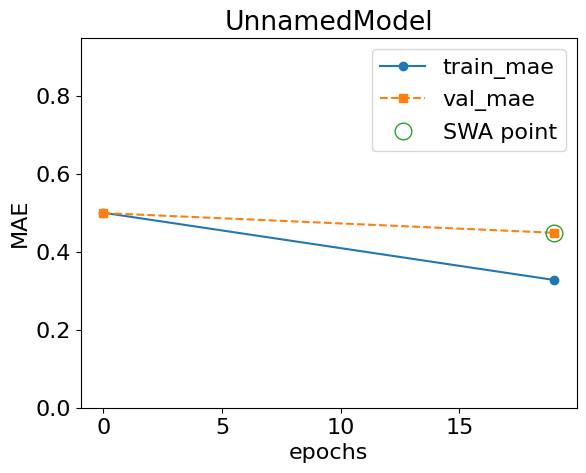

Epoch: 39/300 --- train auc: 0.984 val auc: 0.682


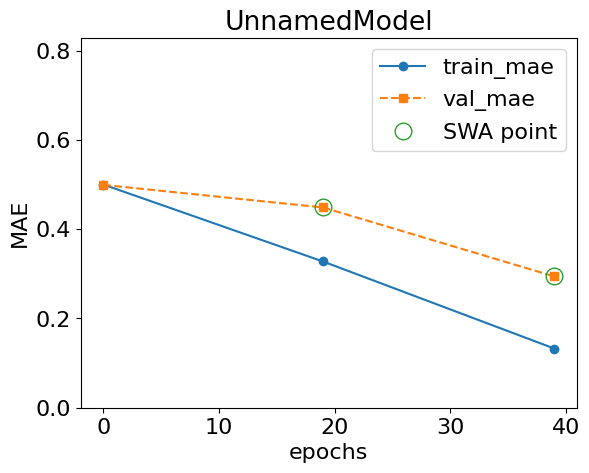

Epoch: 59/300 --- train auc: 0.995 val auc: 0.750


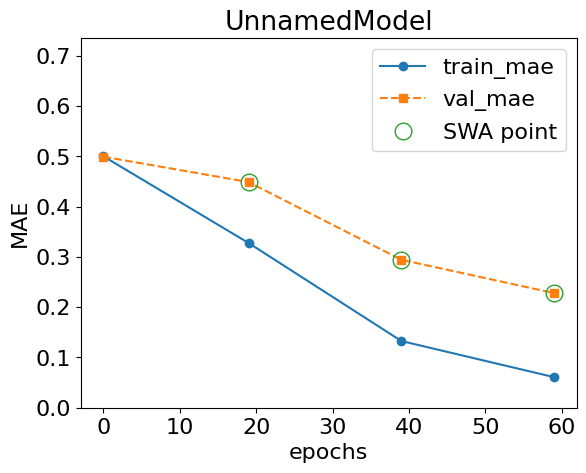

Epoch 79 failed to improve.
Discarded: 1/3 weight updates
Epoch: 79/300 --- train auc: 0.996 val auc: 0.803


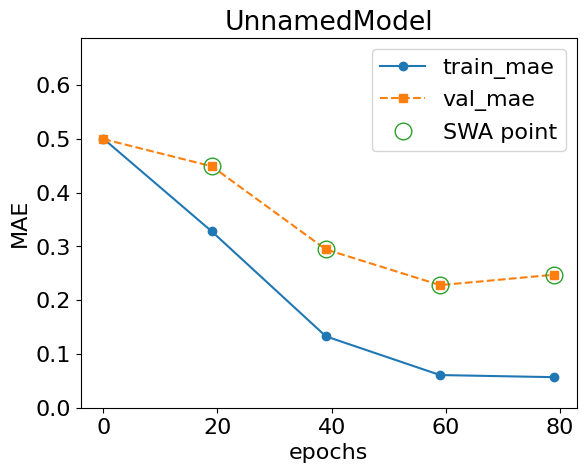

Epoch: 99/300 --- train auc: 0.999 val auc: 0.879


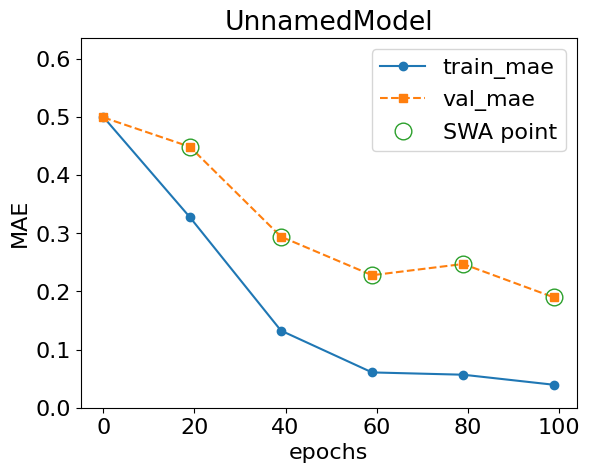

Epoch: 119/300 --- train auc: 0.998 val auc: 0.886


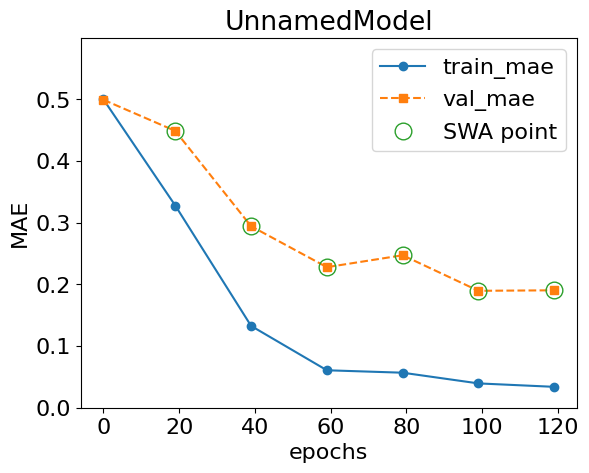

Epoch: 139/300 --- train auc: 1.000 val auc: 0.917


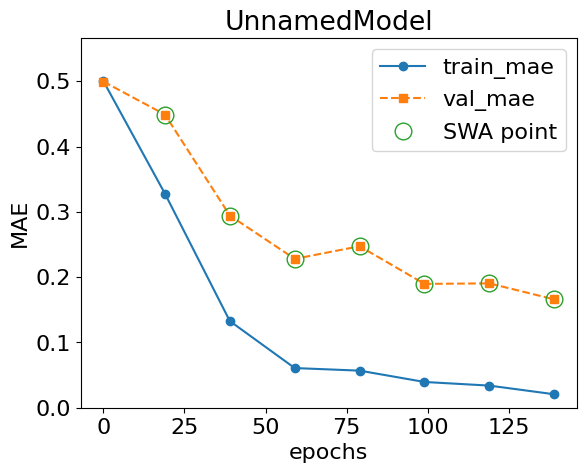

Epoch 159 failed to improve.
Discarded: 2/3 weight updates
Epoch: 159/300 --- train auc: 1.000 val auc: 0.902


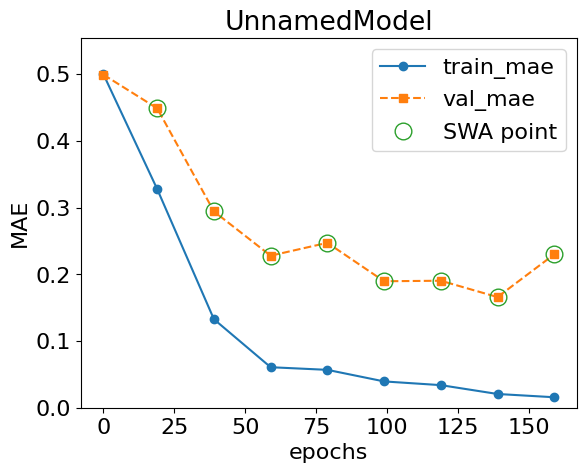

Epoch 179 failed to improve.
Discarded: 3/3 weight updates
Epoch: 179/300 --- train auc: 1.000 val auc: 0.841


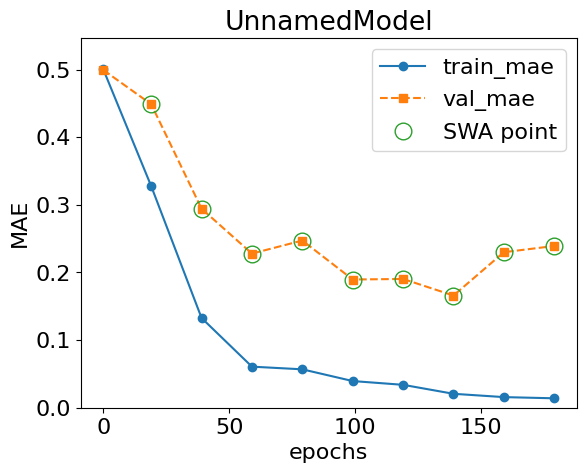

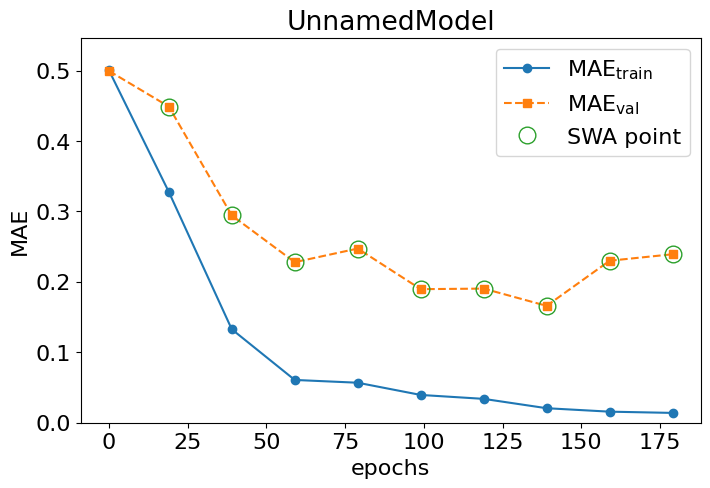

Discarded: 3/3weight updates, early-stopping now
Saving network (UnnamedModel) to models/trained_models/UnnamedModel.pth


In [18]:
cb.fit(train_data)